In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
data=pd.read_csv('/content/Program_1_Dataset.csv')

In [5]:
data.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [6]:
data.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
data.describe

<bound method NDFrame.describe of      Crime_Rate  Zone_proportion  Non_Retail_Acres  CHAS    NOX  Avg_rooms   \
0       0.06860              0.0              2.89     0  0.445       7.416   
1       0.14866              0.0              8.56     0  0.520       6.727   
2       0.11432              0.0              8.56     0  0.520       6.781   
3       0.22876              0.0              8.56     0  0.520       6.405   
4       0.21161              0.0              8.56     0  0.520       6.137   
..          ...              ...               ...   ...    ...         ...   
501    12.80230              0.0             18.10     0  0.740       5.854   
502    10.67180              0.0             18.10     0  0.740       6.459   
503     6.28807              0.0             18.10     0  0.740       6.341   
504     9.92485              0.0             18.10     0  0.740       6.251   
505     9.32909              0.0             18.10     0  0.713       6.185   

      AGE  Distan

Text(0, 0.5, 'MValue')

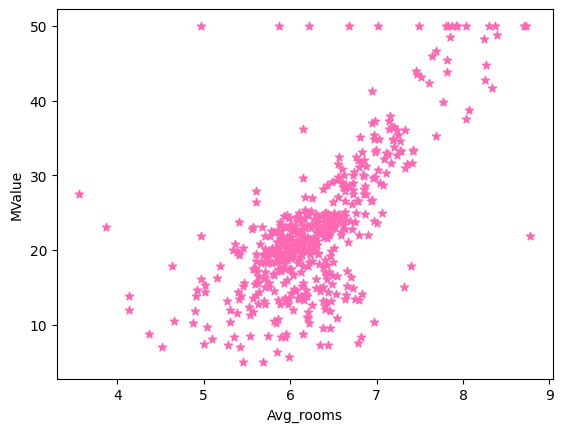

In [15]:
plt.scatter(data['Avg_rooms '],data['MValue'],color='hotpink',marker='*')
plt.xlabel("Avg_rooms")
plt.ylabel("MValue")

<Axes: >

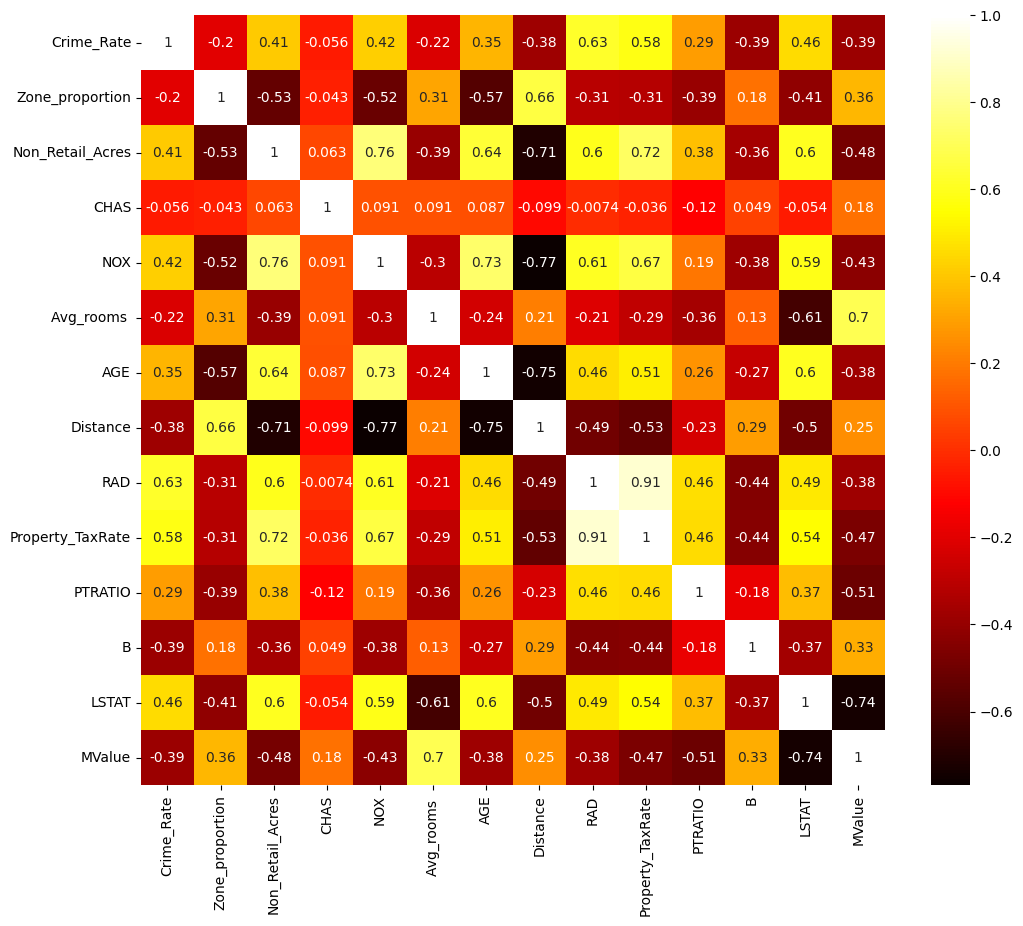

In [21]:
import seaborn as sns
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), cmap = 'hot', annot =True)

In [25]:
A=data[['Avg_rooms ']]
B=data['MValue']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(A, B, test_size=0.3, random_state = 42)

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [28]:
model.fit(X_train, Y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)


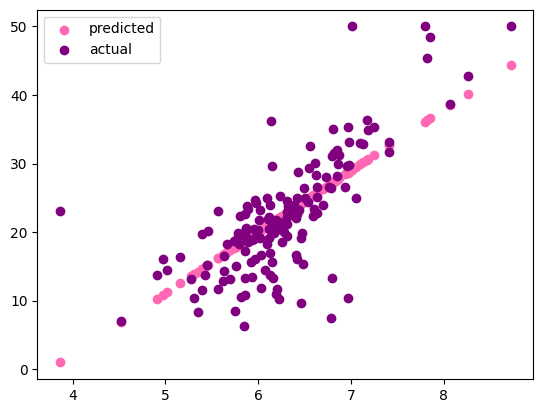

In [31]:
plt.scatter(X_test,y_pred,color='hotpink')
plt.scatter(X_test,Y_test,color='purple')
plt.legend({'predicted','actual'})

In [32]:
data = data.rename(columns={'Avg_rooms ': 'Avg_rooms'})

In [33]:
x=data.Avg_rooms
y=data.MValue
xy=x*y
n=len(data)
xmean=data.Avg_rooms .mean()
ymean=data.MValue.mean()
numerator=xy.sum()-n*xmean*ymean
denominator=(x**2).sum()-n*(xmean**2)
m=numerator/denominator
c=ymean-(m*xmean)
print('intercept-c:',c,'coefficient-m',m)

intercept-c: -34.67062077643849 coefficient-m 9.102108981180297


In [34]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_pred=model.predict(X_train)
print("Mean Squared Error:\n",mean_squared_error(Y_train,y_pred))
print("R2 score is:\n",r2_score(Y_train,y_pred))

Mean Squared Error:
 47.81170547959663
R2 score is:
 0.46176397399316227


In [35]:
y_pred=model.predict(X_test)
print("Mean Squared Error:\n",mean_squared_error(Y_test,y_pred))
print("R2 score is:\n",r2_score(Y_test,y_pred))

Mean Squared Error:
 33.853804802145724
R2 score is:
 0.5424461839891813
